In [2]:
import pandas as pd
import numpy as np
from PyALE import ale
import joblib
from sklearn.preprocessing import OneHotEncoder

In [12]:
xgb = joblib.load("models/XGBClassifier_ohe_mode_allcat.pkl")
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df_ohe = pd.read_csv("data/ohe_mode_allcat.csv")

ohe_col = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

In [13]:
df_ohe.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
# df transformation
df['temperature'] = df['temperature'].astype(object)
change_row = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for i in change_row:
    df[i] = f'{i}_' + df[i].astype(str)

In [15]:
from pyale import hyeni_pyale

PyALE._ALE_generic:INFO: categorical feature detected.


,eff,size,lowerCI_95%,upperCI_95%
coupon,,,,
Coffee House,0.174781,3996,NaN,NaN
Restaurant(<20),-0.005402,2786,-0.014569,0.003766
Carry out & Take away,-0.211812,2393,-0.225048,-0.198577
Restaurant(20-50),-0.105506,1492,-0.122465,-0.088546
Bar,-0.009467,2017,-0.023611,0.004677


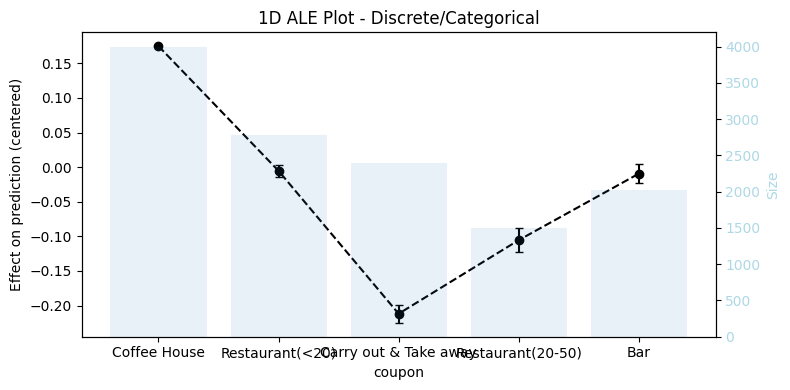

In [18]:
hyeni_pyale(df,df_ohe,xgb,'coupon')

In [44]:
ohe = OneHotEncoder()
coded_feature = pd.DataFrame(ohe.fit_transform(df[["destination"]]).toarray(),columns=[x for i in ohe.categories_ for x in i])
coded_feature

,Home,No Urgent Place,Work
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
12679,1.0,0.0,0.0
12680,0.0,0.0,1.0
12681,0.0,0.0,1.0
12682,0.0,0.0,1.0


In [34]:
features = df_ohe.columns

In [35]:
coded_feature.columns.to_list()

['Home', 'No Urgent Place', 'Work']

In [36]:
X_feat_raw = df_ohe.drop(coded_feature.columns.to_list(), axis=1, inplace=False).copy()

In [37]:
X_feat_raw

,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,30,55,80,...,Restaurant20To50_less1,Restaurant20To50_nan,Restaurant20To50_never,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1,1,0,0,0,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,1,0,0,0,1,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,1,1,0,0,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,1,1,0,0,1,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,1,0,0,1,0,1
12680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,1
12681,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,1,0,0
12682,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,1,1,0,1,0


PyALE._ALE_generic:INFO: categorical feature detected.


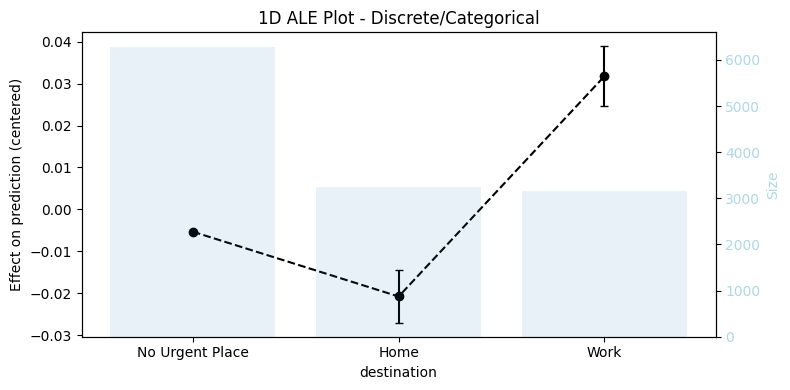

In [43]:
## 1D - categorical
one_hot_encoder = OneHotEncoder().fit(df[["destination"]])

def onehot_encode(feat, ohe=one_hot_encoder):
    col_names = ohe.categories_[0]
    feat_coded = pd.DataFrame(ohe.transform(feat).toarray())
    feat_coded.columns = col_names
    return feat_coded

ale_eff = ale(
    X=pd.concat([X_feat_raw,df['destination']], axis=1),
    model=xgb.best_estimator_.named_steps.model,
    feature=["destination"],
    encode_fun=onehot_encode,
    predictors=features,
)

In [5]:
X_feat_raw = df[ohe_col]

In [6]:
X_feat_raw #non ohe data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Bar_never,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Bar_never,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Bar_never,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Bar_never,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Bar_never,CoffeeHouse_never,CarryAway_nan,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,Bar_never,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,Bar_never,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,Bar_never,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,Bar_never,CoffeeHouse_never,CarryAway_1~3,RestaurantLessThan20_4~8,Restaurant20To50_1~3,1,1,1,0,1


In [9]:
def onehot_encode(feat, ohe):
    col_names = ohe.categories_[0]
    feat_coded = pd.DataFrame(ohe.transform(feat).toarray())
    feat_coded.columns = col_names
    return feat_coded

In [10]:
ohe = OneHotEncoder().fit(df[['destination']])
coded_feature = onehot_encode(df[["destination"]],ohe)
features = X_feat_raw.drop(columns="destination").columns.to_list() + coded_feature.columns.to_list()
features

['passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Home',
 'No Urgent Place',
 'Work']

In [11]:
ohe = OneHotEncoder().fit(df[['destination']])



In [14]:
features

['passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Home',
 'No Urgent Place',
 'Work']

In [12]:
ale_eff = ale(
X=X_feat_raw,
model=xgb.best_estimator_.named_steps.model,
feature=['destination'],
encode_fun=onehot_encode,
predictors=features
)

PyALE._ALE_generic:INFO: categorical feature detected.
/Users/nicole/miniconda3/envs/msia420-2/lib/python3.10/site-packages/PyALE/_src/ALE_1D.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].astype(str)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [14]:
for i in ohe_col:
    ohe = OneHotEncoder().fit(df[i])
    
    ale_eff = ale(
    X=X_feat_raw,
    model=model,
    feature=i,
    encode_fun=onehot_encode,
    predictors=X_feat_raw[i].unique.tolist(),
    )

ValueError: Expected 2D array, got 1D array instead:
array=['No Urgent Place' 'No Urgent Place' 'No Urgent Place' ... 'Work' 'Work'
 'Work'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
## 1D - categorical
